# TP n° X5 - Biprisme de Fresnel

Ce TP est consacré à l'étude de l'interfrange d'une dispostif interférométrique assimilable aux fentes d'Young.

**Capacité mise en oeuvre** 
* Mettre en œuvre un photodétecteur en sortie d’un interféromètre.

Le langage de programmation utilisé est le langage python.

## I – Dispositif

Le biprisme de Fresnel est un dispostif d'optique géométrique qui permet de faire apparaître deux sources S$_1$ et S$_2$, chacune image d'une source unique S par un primse.

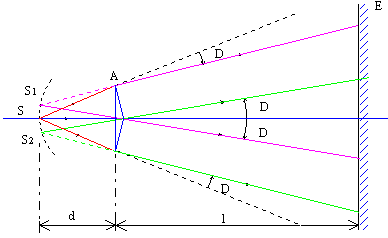

Il est constitué de deux prismes identiques, d’indice $n$ et d’angle au sommet $A$ petit ($A\ll 1$), accolés par la base. Une fente source S, placée dans le plan de symétrie du biprisme et parallèle aux arêtes communes des prismes, éclaire le biprisme ; chaque biprisme dévie un
rayon incident d’un angle $D = (n − 1)A$, vers sa base. Un dioptre 
plan étant stigmatique et aplanétique de façon approché dans les conditions de Gauss, chaque biprisme émet un faisceau qui semble être issu l’un de S$_1$, l’autre de S$_2$ avec $a=S_1S2 = 2(n − 1)Ad$.
Dans le champ d’interférence, on peut observer un phénomène d’interférence non localisée. Si l’écran est placé perpendiculairement à la base des prismes, l’intensité obtenue en lumière monochromatique, de longueur d’onde $\lambda_0$ est
$$I=2I_0\left[1+\cos\left(2\pi \frac{x}{i}\right)\right]\ ,$$
avec l’interfrange
$$i=\frac{\lambda_0(l+d)}{a}=\frac{\lambda_0(l+d)}{2(n − 1)Ad} \ .$$

## II – Montage

Le montage est représenté sur la figure suivante. La fente source est inclinable et réglable en hauteur : le laser est proche de la fente 
pour obtenir une luminosité maximale.

1. Au deux extrémités du banc, disposer le laser (sans élargisseur de faisceau) et le capteur CCD (avec son filtre de protection aimanté), ce dernier sur un pied ajustable latéralement.

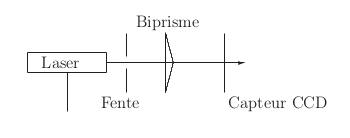

2. Brancher le capteur sur le secteur et l’ordinateur, puis démarrer le PC et, dans " PC/Logiciel Capteur Linéaire/W/AS", lancer EsaoSt (patientez, il est vraiment très lent au démarrage).

3. Pendant le démarrage du logiciel, ajuster la hauteur et l’orientation de laser pour envoyer le faisceau au centre du filtre de protection ;

4. Entre le laser et le capteur, à environ 60 cm du laser, placer le biprisme, rendre l’arête commune des prismes bien verticale et vérifier que le faisceau tombe sur cette arête commune aux deux prismes (ajuster éventuellement l’orientation du laser) ;

5. Entre le laser et le biprisme, à environ 10 cm du laser, placer la fente réglable sur un pied pouvant se déplacer latéralement et l’ajuster de manière à ce que le faiseau atteigne la fente ;

6. Installer l’élargisseur de faisceau sur le laser, fermer la fente presqu’entièrement et retirer le filtre du capteur : la figure d’interférence apparaît (ou pas) sur l’écran de l’ordinateur (la case « ajustement automatique du temps d’ajustement doit être cochée ») ;

7. Si elle n’apparaît pas, réduire la taille de la fente et retoucher le parallélisme de la fente aux arêtes communes des prismes.

8. En déplaçant le capteur, vérifier que les franges ne sont pas localisées et que l’interfrange augmente avec $\ell$

## III - Mesures et exploitation

### III.A – Première étude

Mesurer l’interfrange $i$ pour plusieurs positions du capteur (utiliser le pointeur d’atelier scientifique pour déterminer plus précisemment la position d’une frange), sans toucher au laser, à la fente et au biprisme (cela revient à faire varier $\ell$ à $d$ constante) et exploiter les
résultats. Pour cela, compléter la cellule n°2 du programme python ci-dessous, puis exécuter les cellules 1 à 3 pour obtenir l’angle $A$ des prismes. Les cellules 4 et 5 font afficher respectivement les résidus 
et les écarts normalisés.

In [1]:
#%% Cellule n°1 : importations

import numpy as np
from matplotlib import pyplot as plt
import statistics

In [2]:
 #%% Cellule n°2 : mesures

d=                           # en mm
tab_l=np.array([,,,])        # Valeurs de l en mm
tab_i=np.array([,,,])    # Valeurs de mm

ui=           # Incertitudes d'office en mm
  
lambda0=                    # Longueur d'onde en nm
n=1.5

In [4]:
#%% Cellule n°3 : regression linéaire
                                              # grandeur en abscisse  

def Regression(tab_i,ui,tab_l)   :
    N=1000
    d=len(tab_l)                                                               # Nombre de valeurs des couples (x,I)  
    tab_Y=np.zeros((N,d))                                                      # N simulations des d valeurs en ordonnée
    tab_a=np.zeros(N)                                                          # N simulations de l'ordonnée à l'origine de la droite de regression
    tab_b=np.zeros(N)                                                          # N simulations de x0
    t_ord=np.zeros(d)                                                          # d valeurs à mettre en ordonnée
    t_uord=np.zeros(d)                                                         # incertitudes (barres d'incertitudes) sur les d valeurs à mettre en ordonnée
    for i in range(N) :                                            
        sim_Y=np.random.normal(tab_i,ui)                                  # simulation des d valeurs de I
        coeff=np.polyfit(tab_l,sim_Y,1)                                        # regression linéaire sur un jeu de valeurs simulé
        tab_Y[i,:]=sim_Y[:]                                                    # stockage des valeurs simulées en ordonnées
        tab_b[i]=coeff[1]                                                      # stockage des ordonnées à l'origine simulées
        tab_a[i]=coeff[0]   
    tab_A=lambda0/(2000000*(n-1)*tab_a*d)                                                  # stockage des x0 simulées
    a=statistics.mean(tab_a)                                                   # calcul de la moyenne de l'ordonnée à l'origine
    b=statistics.mean(tab_b)                                        # stockage des x0 simulées
    A=statistics.mean(tab_A) 
    uA=statistics.pstdev(tab_A)                                         # calcul de l'incertitude sur x0
    for i in range(d):
       t_ord[i]=statistics.mean(tab_Y[:,i])                                    # calcul de la moyenne de chacune des d valeurs à mettre en ordonnées
       t_uord[i]=statistics.pstdev(tab_Y[:,i])                                 # calcul des d barres d'incertitudes en ordonnées
    return a, b, A, uA,t_ord,t_uord

plt.clf()
plt.ylabel(r'$i$ en mm')
plt.xlabel(r'$l$ en mm')

a, b, A, uA,t_ord,t_uord=Regression(tab_i,ui,tab_l) 

plt.errorbar(tab_l, t_ord, xerr =0, yerr = t_uord,fmt='o', linestyle='none',color = 'b', label = 'Points expérimentaux' )
plt.plot(tab_l, b+a*tab_l, label = 'Regression' )
plt.show()                                                    

print('A=', A/np.pi*180,' degrés avec une incertitude type ',uA/np.pi*180,' degrés')

A= 14.324603096379882  degrés avec une incertitude type  0.1524947932490929  degrés


In [6]:
#%% Cellule n°4 : résidus

plt.clf()
plt.ylabel(r'$i$ en mm')
plt.xlabel(r'$l$ en mm')
plt.errorbar(tab_l, t_ord-(b+a*tab_l), xerr =0, yerr = t_uord,fmt='o', linestyle='none',color = 'b', label = 'Résidus' )
plt.show()                                                 

In [7]:
#%% Cellule n°5 écarts normalisés

plt.clf()
plt.ylabel(r'$i$ en mm')
plt.xlabel(r'$l$ en mm')
plt.errorbar(tab_l, (t_ord-(b+a*tab_l))/t_uord, xerr =0, yerr = 0,fmt='o', linestyle='none',color = 'b', label = 'Ecarts normalisés' )
plt.fill_between(tab_l, 2,-2, color='0.9')                          
plt.show()                                                  

### III.B –Seconde étude 

Recommencer l’étude, mais en faisant varier la seule position du biprisme sans toucher aux autres éléments du dipositif (cela revient à faire varier $d$ à $\ell + d$ constant). Pour exploiter les résultats, compléter la cellule n°6 du programme python ci-dessous,
puis exécuter les cellules 6 et 7 pour obtenir l’angle $A$ des prismes. Les cellules 8 et 9 font afficher respectivement les résidus et les écarts normalisés.

In [13]:
#%% Cellule n°6 : mesures

L =                               # longueur l + d en mm
tab_d=np.array([, , ,])     # Valeurs de d en mm
tab_i=np.array([,,,])    # Valeurs de mm

ui=                    # Incertitudes d'office en mm
  
lambda0=                           # Longueur d'onde en nm
n=1.5

In [14]:
#%% Cellule n°7 : regression linéaire
                                              # grandeur en abscisse  

def Regression(tab_i,ui,tab_d)   :
    N=1000
    d=len(tab_d)                                                               # Nombre de valeurs des couples (x,I)  
    tab_Y=np.zeros((N,d))                                                      # N simulations des d valeurs en ordonnée
    tab_X=1/tab_d
    tab_a=np.zeros(N)                                                          # N simulations de l'ordonnée à l'origine de la droite de regression
    tab_b=np.zeros(N)                                                          # N simulations de x0
    t_ord=np.zeros(d)                                                          # d valeurs à mettre en ordonnée
    t_uord=np.zeros(d)                                                         # incertitudes (barres d'incertitudes) sur les d valeurs à mettre en ordonnée
    for i in range(N) :                                            
        sim_Y=np.random.normal(tab_i,ui)                                  # simulation des d valeurs de I
        coeff=np.polyfit(tab_X,sim_Y,1)                                        # regression linéaire sur un jeu de valeurs simulé
        tab_Y[i,:]=sim_Y[:]                                                    # stockage des valeurs simulées en ordonnées
        tab_a[i]=coeff[0]                                                      # stockage des ordonnées à l'origine simulées
        tab_b[i]=coeff[1]   
    tab_A=lambda0*L/(2000*(n-1)*tab_a)                                                  # stockage des x0 simulées
    a=statistics.mean(tab_a)                                                   # calcul de la moyenne de l'ordonnée à l'origine
    b=statistics.mean(tab_b)                                        # stockage des x0 simulées
    A=statistics.mean(tab_A) 
    uA=statistics.pstdev(tab_A)                                         # calcul de l'incertitude sur x0
    for i in range(d):
       t_ord[i]=statistics.mean(tab_Y[:,i])                                    # calcul de la moyenne de chacune des d valeurs à mettre en ordonnées
       t_uord[i]=statistics.pstdev(tab_Y[:,i])                                 # calcul des d barres d'incertitudes en ordonnées
    return a, b, A, uA,t_ord,t_uord

plt.clf()
plt.ylabel(r'$i$ en mm')
plt.xlabel(r'$1/d$ en mm$^{-1}$')

a, b, A, uA,t_ord,t_uord=Regression(tab_i,ui,tab_d) 

plt.errorbar(1/tab_d, t_ord, xerr =0, yerr = t_uord,fmt='o', linestyle='none',color = 'b', label = 'Points expérimentaux' )
plt.plot(1/tab_d, b+a/tab_d, label = 'Regression' )
plt.show()                                                    

print('e=', A/np.pi*180,' degrés avec une incertitude type ',uA/np.pi*180,' degrés')

e= 458.26447562030637  degrés avec une incertitude type  9.449566550736234  degrés


In [15]:
#%% Cellule n°8 : résidus

plt.clf()
plt.ylabel(r'$i$ en mm')
plt.xlabel(r'$1/d$ en mm$^{-1}$')
plt.errorbar(1/tab_d, t_ord-(b+a/tab_d), xerr =0, yerr = t_uord,fmt='o', linestyle='none',color = 'b', label = 'Résidus' )
plt.show()                                                 

In [16]:
#%% Cellule n°9 écarts normalisés

plt.clf()
plt.ylabel(r'$i$ en mm')
plt.xlabel(r'$1/d$ en mm$^{-1}$')
plt.errorbar(1/tab_d, (t_ord-(b+a/tab_d))/t_uord, xerr =0, yerr = 0,fmt='o', linestyle='none',color = 'b', label = 'Ecarts normalisés' )
plt.fill_between(1/tab_d, 2,-2, color='0.9')                          
plt.show()                                                  